# <center>Titanic

# 1. Definition Problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This research tries to answer the question of “what sorts of people were likely to survive?”. Using Machine Learning tools and techniques the research predicts which passengers survived the tragedy.

More about the RMS Titanic tragedy is available in [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)

# 2. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, euclidean_distances

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from eli5 import show_weights

In [3]:
sns.set()

# 3. Data Collection

In [4]:
train_data = pd.read_csv('datasets/train.csv', sep=',')
test_data = pd.read_csv('datasets/test.csv', sep=',')

# 4. Data Overview

## Data dictionary

| Feature     | Description |
|:----------- |:------------|
| PassengerId | Passenger Id |
| Survived    | Survival (survived = 1, deceased = 0) |
| Pclass      | Ticket class (upper = 1, middle = 2, lower = 3) |
| Name	      | Passenger name |
| Sex	      | Sex (male, female) |
| Age	      | Age in years or fraction |
| SibSp       | Number of siblings / spouses aboard |
| Parch       | Number of parents / children aboard |
| Ticket      | Ticket number |
| Fare        | Passenger fare |
| Cabin       | Cabin number |
| Embarked    | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

## 4.1. Looking into the training dataset

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Silven, Miss. Lyyli Karoliina",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4.2. Looking into the test dataset

In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_data.shape

(418, 11)

In [12]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Case, Mr. Howard Brown",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 5. Data Cleaning

## 5.1. Duplicate Data

In [15]:
train_data.duplicated().any(), test_data.duplicated().any()

(False, False)

## 5.2. Missing Data

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_data.isna().sum(axis=0) / train_data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
test_data.isna().sum(axis=0) / test_data.shape[0] * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

### 5.2.1. Embarked

In [20]:
embarked_mode = train_data['Embarked'].mode()[0]
embarked_mode

'S'

In [21]:
train_data['Embarked'].fillna(value=embarked_mode, inplace=True)

In [22]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### 5.2.2. Cabin

In [23]:
for data in [train_data, test_data]:
    data.drop(columns='Cabin', inplace=True)

# 6. Exploratory Data Analysis

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


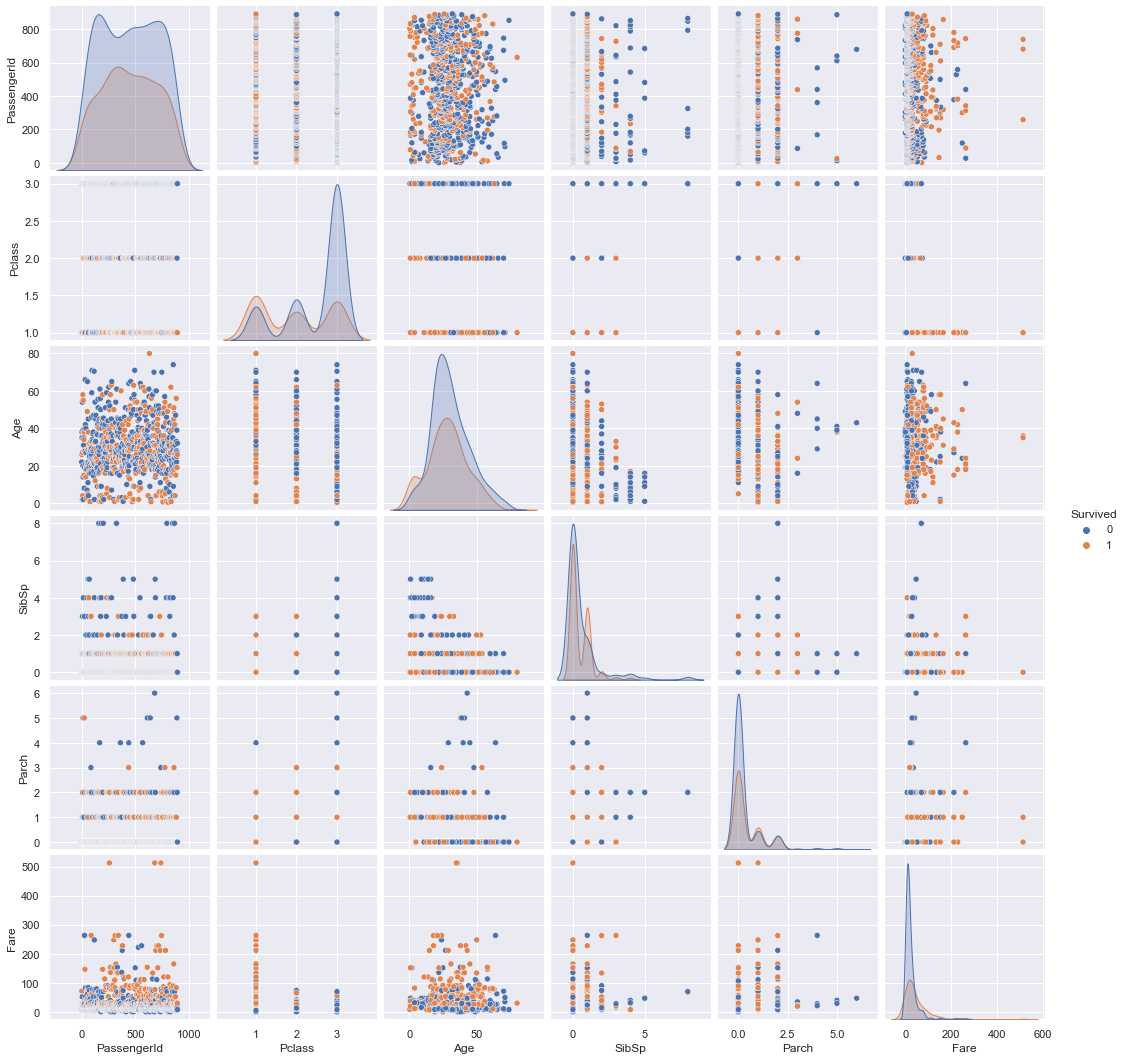

In [25]:
sns.pairplot(train_data, hue='Survived');

## 6.1. Survived

In [26]:
count = train_data['Survived'].value_counts()
per_cent = train_data['Survived'].value_counts(normalize=True)

pd.DataFrame({'count': count, 'percentage': per_cent})

,count,percentage
0,549,0.616162
1,342,0.383838


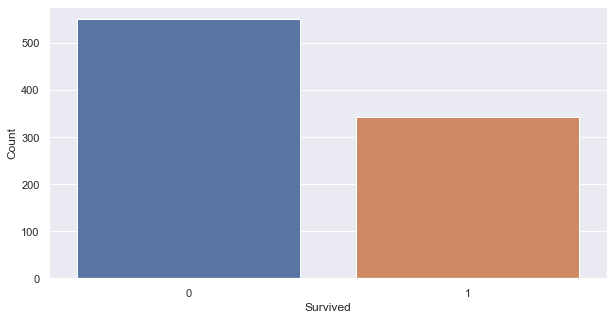

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=train_data)

plt.ylabel('Count');

## 6.2. Pclass & Survived

In [28]:
train_data['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


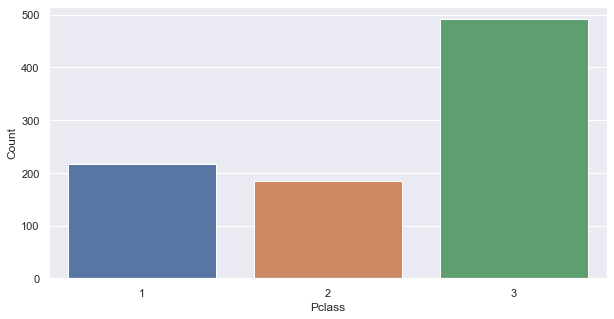

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=train_data)

plt.ylabel('Count');

In [30]:
tab = pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize='index')
tab

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


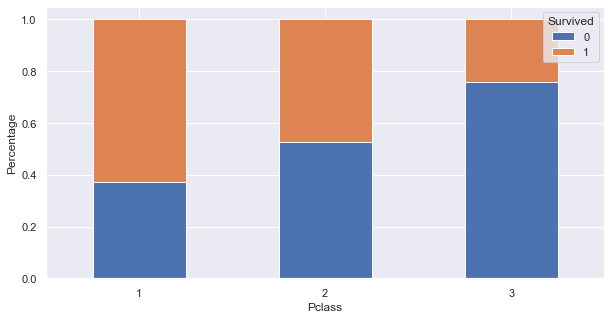

In [31]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 6.3. Sex & Survived

In [32]:
train_data['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


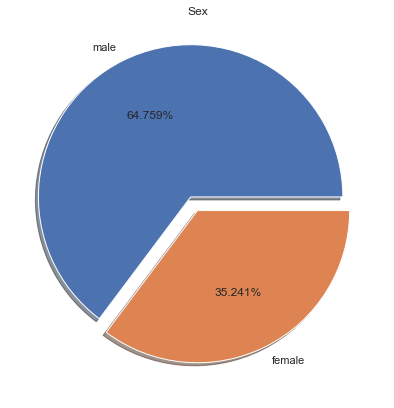

In [33]:
plt.figure(figsize=(10, 7))
plt.pie(train_data['Sex'].value_counts(), explode=[0.1, 0], labels=train_data['Sex'].unique(), autopct='%.3f%%', shadow=True)

plt.title('Sex');

In [34]:
tab = pd.crosstab(train_data['Sex'], train_data['Survived'], normalize='index')
tab

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


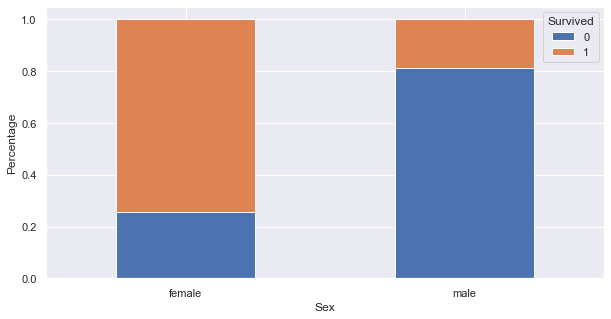

In [35]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 6.4. Age & Survived

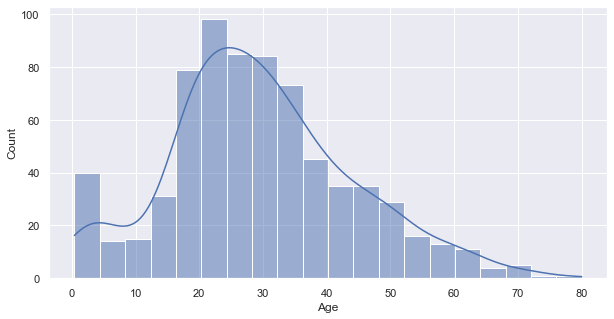

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', data=train_data, kde=True)

plt.ylabel('Count');

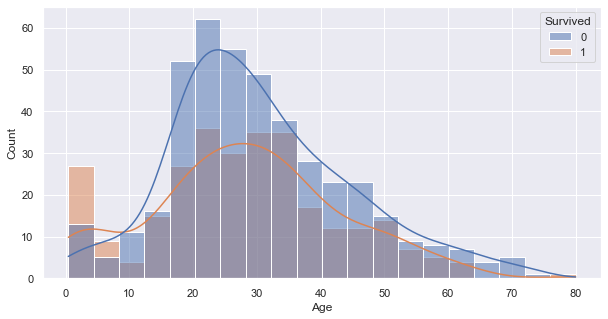

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True)

plt.ylabel('Count');

In [38]:
train_data.groupby(by='Survived')['Age'].describe().T

Survived,0,1
count,424.000000,290.000000
mean,30.626179,28.343690
std,14.172110,14.950952
min,1.000000,0.420000
25%,21.000000,19.000000
50%,28.000000,28.000000
75%,39.000000,36.000000
max,74.000000,80.000000


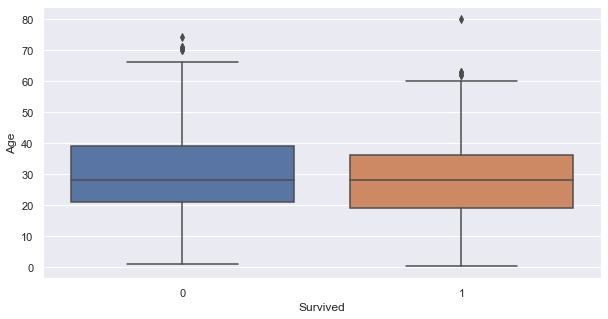

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=train_data);

## 6.5. SibSp & Survived

In [40]:
train_data['SibSp'].value_counts().to_frame()

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


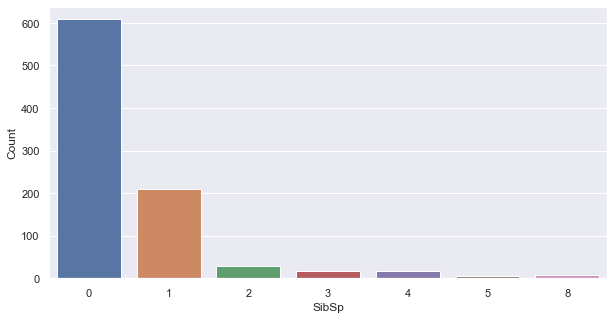

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp', data=train_data)

plt.ylabel('Count');

In [42]:
tab = pd.crosstab(train_data['SibSp'], train_data['Survived'], normalize='index')
tab

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


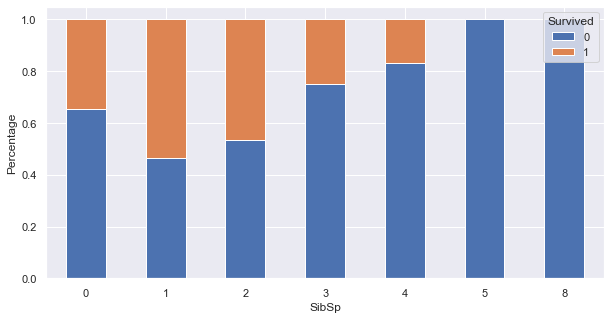

In [43]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 6.6. Parch & Survived

In [44]:
train_data['Parch'].value_counts().to_frame()

,Parch
0,678
1,118
2,80
5,5
3,5
4,4
6,1


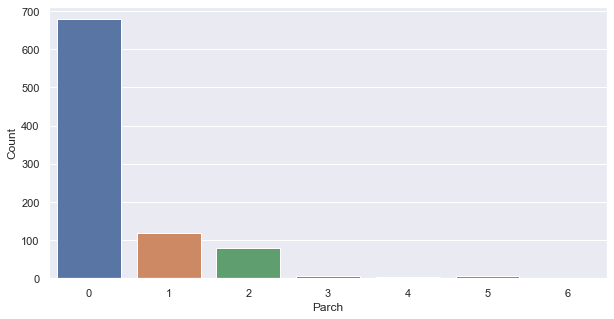

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', data=train_data)

plt.ylabel('Count');

In [46]:
tab = pd.crosstab(train_data['Parch'], train_data['Survived'], normalize='index')
tab

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


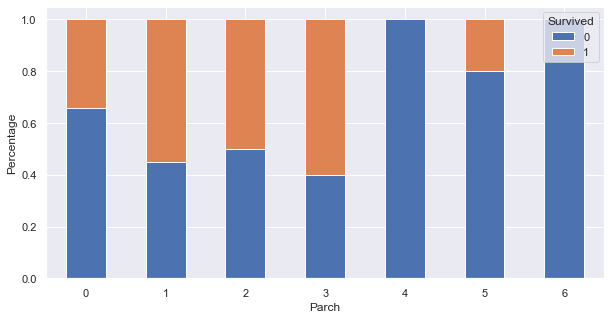

In [47]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 6.7. Fare & Survived

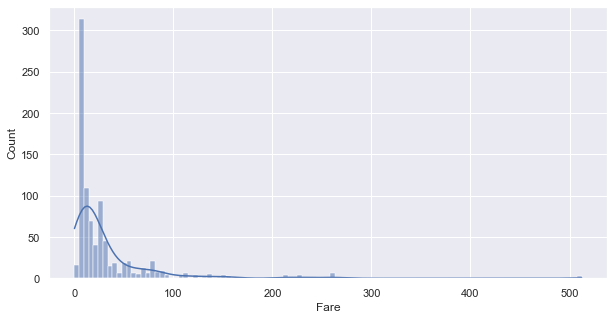

In [48]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Fare', data=train_data, kde=True)

plt.ylabel('Count');

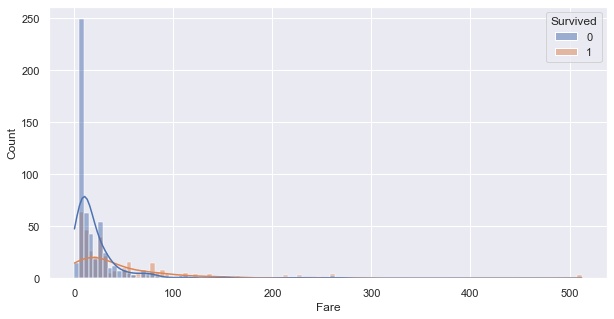

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Fare', hue='Survived', data=train_data, kde=True)

plt.ylabel('Count');

In [50]:
train_data.groupby(by='Survived')['Fare'].describe().T

Survived,0,1
count,549.000000,342.000000
mean,22.117887,48.395408
std,31.388207,66.596998
min,0.000000,0.000000
25%,7.854200,12.475000
50%,10.500000,26.000000
75%,26.000000,57.000000
max,263.000000,512.329200


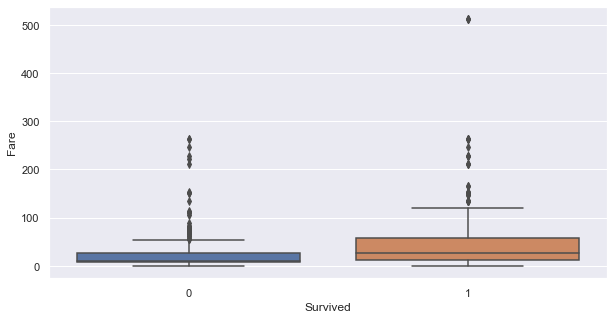

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=train_data);

## 6.8. Embarked & Survived

In [52]:
train_data['Embarked'].value_counts().to_frame()

,Embarked
S,646
C,168
Q,77


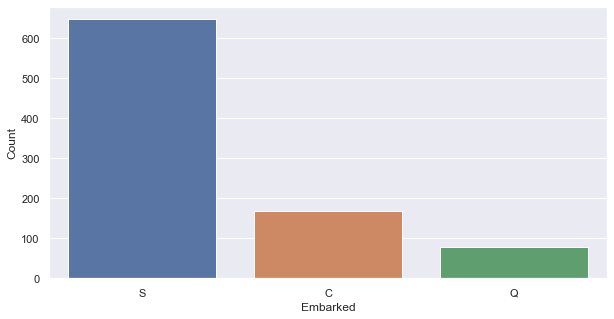

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=train_data)

plt.ylabel('Count');

In [54]:
tab = pd.crosstab(train_data['Embarked'], train_data['Survived'], normalize='index')
tab

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


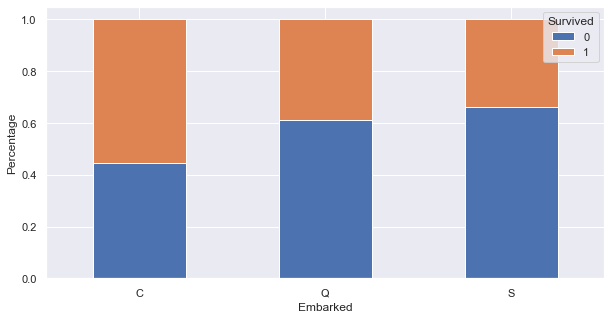

In [55]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 6.9. Pclass & Sex

In [56]:
tab = pd.crosstab(train_data['Pclass'], train_data['Sex'], normalize='index')
tab

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


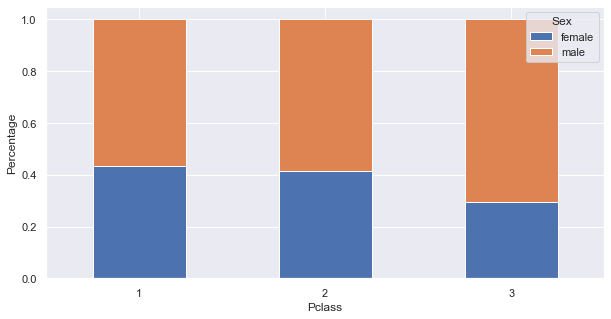

In [57]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 6.10. Pclass, Sex & Survived

In [58]:
train_data.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


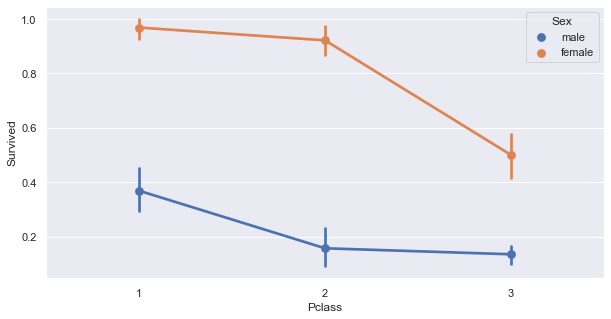

In [59]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_data);

## 6.11. Pclass, Sex, Embarked & Survived

In [60]:
train_data.pivot_table(values='Survived', index='Pclass', columns=['Embarked', 'Sex'], aggfunc='mean')

Embarked         C                   Q                   S          
Sex         female      male    female      male    female      male
Pclass                                                              
1         0.976744  0.404762  1.000000  0.000000  0.960000  0.354430
2         1.000000  0.200000  1.000000  0.000000  0.910448  0.154639
3         0.652174  0.232558  0.727273  0.076923  0.375000  0.128302

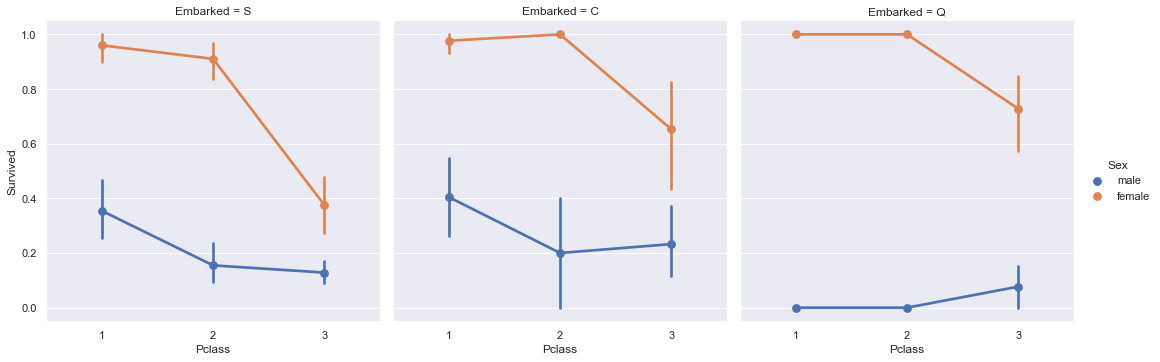

In [61]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, col='Embarked', kind='point');

## 6.12. Pclass & Age

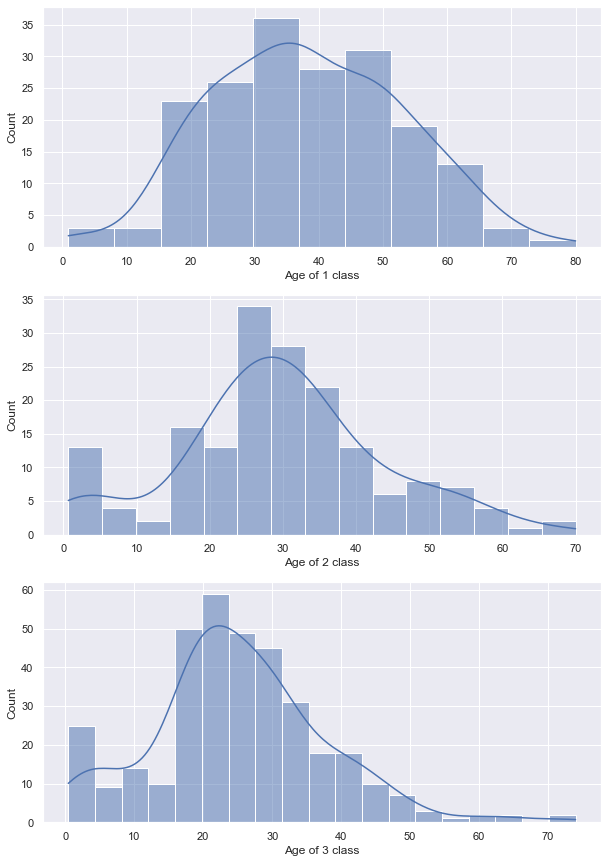

In [62]:
plt.figure(figsize=(10, 15))
for idx, cls in enumerate(np.sort(train_data['Pclass'].unique())):
    plt.subplot(3, 1, idx + 1)
    
    sns.histplot(x=train_data[train_data['Pclass'] == cls]['Age'], kde=True)
    
    plt.xlabel(f'Age of {cls} class')
    plt.ylabel('Count')

In [63]:
train_data.groupby(by='Pclass')['Age'].describe().T

Pclass,1,2,3
count,186.000000,173.000000,355.000000
mean,38.233441,29.877630,25.140620
std,14.802856,14.001077,12.495398
min,0.920000,0.670000,0.420000
25%,27.000000,23.000000,18.000000
50%,37.000000,29.000000,24.000000
75%,49.000000,36.000000,32.000000
max,80.000000,70.000000,74.000000


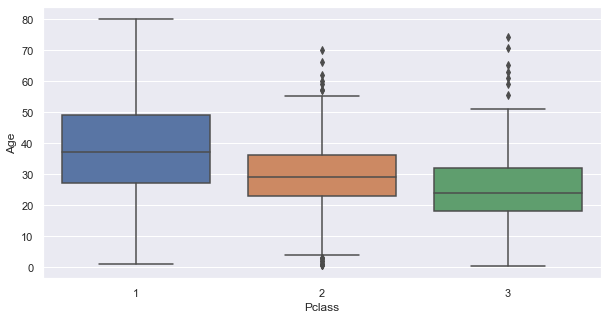

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=train_data);

## 6.13. Pclass, Age & Survived

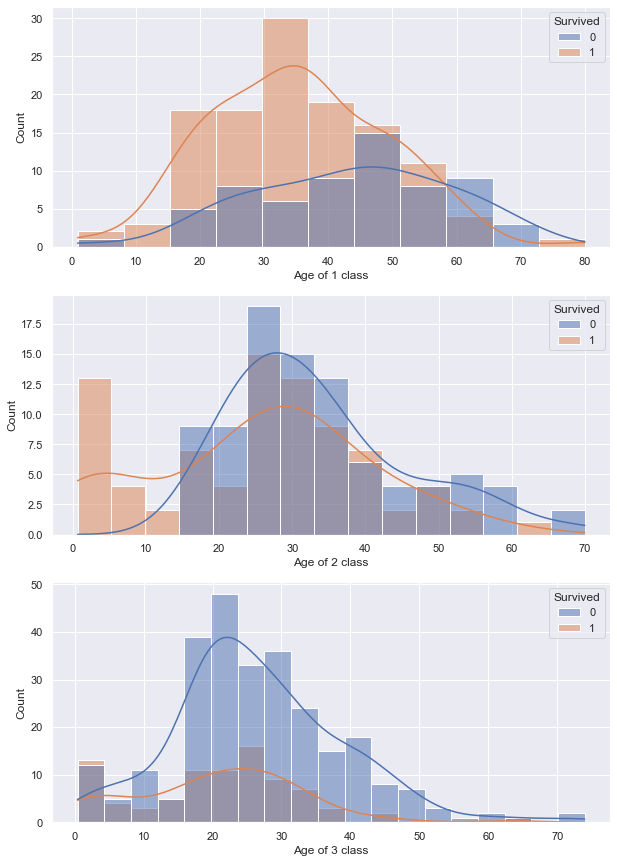

In [65]:
plt.figure(figsize=(10, 15))
for idx, cls in enumerate(np.sort(train_data['Pclass'].unique())):
    plt.subplot(3, 1, idx + 1)
    sns.histplot(x=train_data[train_data['Pclass'] == cls]['Age'], hue=train_data['Survived'], kde=True)
  
    plt.xlabel(f'Age of {cls} class')
    plt.ylabel('Count')

In [66]:
train_data.groupby(by=['Pclass', 'Survived'])['Age'].describe()

count       mean        std    min    25%    50%    75%   max
Pclass Survived                                                               
1      0          64.0  43.695312  15.284243   2.00  31.00  45.25  55.25  71.0
       1         122.0  35.368197  13.760017   0.92  24.25  35.00  45.00  80.0
2      0          90.0  33.544444  12.151581  16.00  25.00  30.50  39.00  70.0
       1          83.0  25.901566  14.837787   0.67  17.50  28.00  34.00  62.0
3      0         270.0  26.555556  12.334882   1.00  19.00  25.00  33.00  74.0
       1          85.0  20.646118  11.995047   0.42  14.00  22.00  29.00  63.0

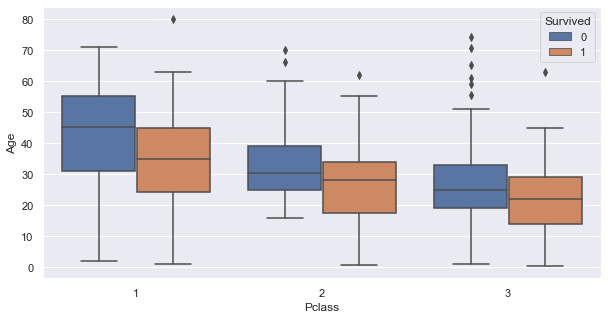

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data);

## 6.14. Sex & Age

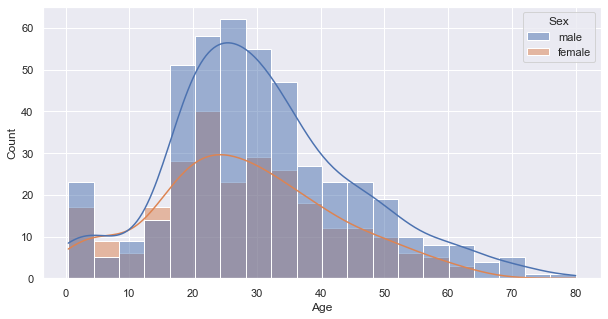

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Sex', data=train_data, kde=True)

plt.ylabel('Count');

In [69]:
train_data.groupby(by=['Sex'])['Age'].describe().T

Sex,female,male
count,261.000000,453.000000
mean,27.915709,30.726645
std,14.110146,14.678201
min,0.750000,0.420000
25%,18.000000,21.000000
50%,27.000000,29.000000
75%,37.000000,39.000000
max,63.000000,80.000000


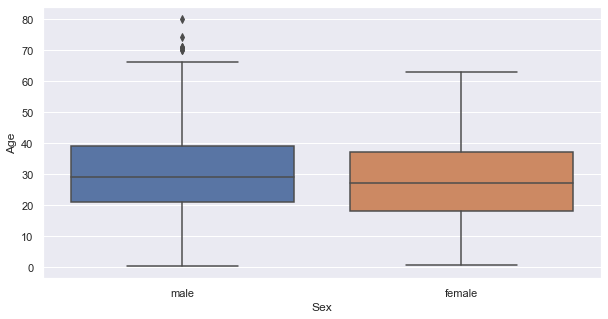

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sex', y='Age', data=train_data);

## 6.15. Sex, Age & Survived

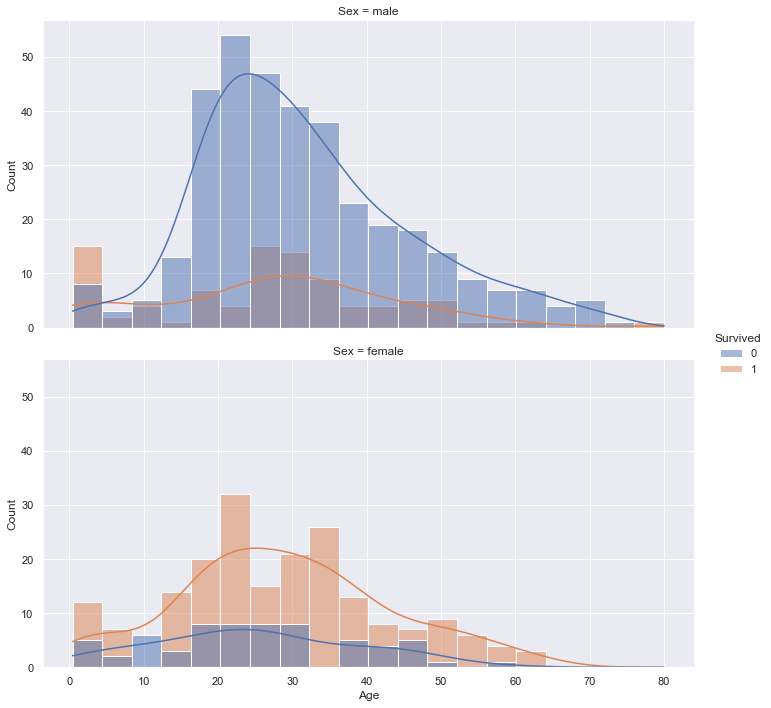

In [71]:
sns.displot(x='Age', hue='Survived', row='Sex', data=train_data, kde=True, height=5, aspect=2);

In [72]:
train_data.groupby(by=['Sex', 'Survived'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Sex    Survived                                                             
female 0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
       1         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
male   0         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
       1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

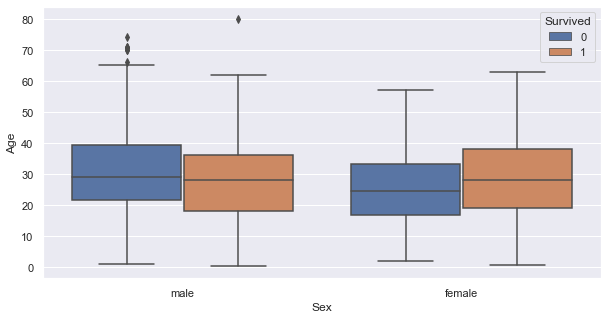

In [73]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train_data);

## 2.16. Age, Fare & Survived

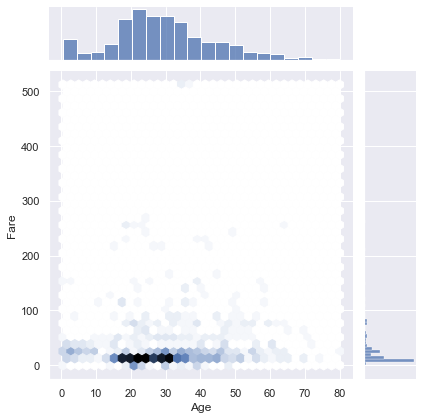

In [74]:
sns.jointplot(x='Age', y='Fare', data=train_data, kind='hex');

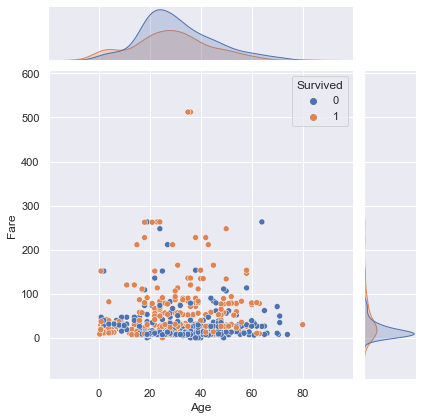

In [75]:
sns.jointplot(x='Age', y='Fare', hue='Survived', data=train_data, kind='scatter');

## 6.17. Pclass, Fare, Embarked & Survived

In [76]:
train_data.groupby(by=['Pclass', 'Embarked', 'Survived'])['Fare'].describe()

count        mean         std      min       25%  \
Pclass Embarked Survived                                                     
1      C        0          26.0   78.841981   64.541917  27.7208  29.94895   
                1          59.0  116.121754  109.514928  26.5500  57.97920   
       Q        0           1.0   90.000000         NaN  90.0000  90.00000   
                1           1.0   90.000000         NaN  90.0000  90.00000   
       S        0          53.0   57.260926   58.473662   0.0000  26.55000   
                1          76.0   79.756689   56.849387  25.9292  30.50000   
2      C        0           8.0   25.418225   10.668990  12.8750  15.04895   
                1           9.0   25.305100   12.562460  12.0000  13.85830   
       Q        0           1.0   12.350000         NaN  12.3500  12.35000   
                1           2.0   12.350000    0.000000  12.3500  12.35000   
       S        0          88.0   18.946591   15.661432   0.0000  11.50000   
                1          76.0   21.926316   10.697942  10.5000  13.00000   
3      C        0          41.0    9.878361    4.093219   4.0125   7.22500   
                1          25.0   13.404668    5.320055   7.2250   7.22920   
       Q        0          45.0   11.654167    7.448127   6.7500   7.75000   
                1          27.0   10.398770    5.336266   7.7333   7.75000   
       S        0         286.0   14.529906   13.296621   0.0000   7.85420   
                1          67.0   15.131464   13.279499   0.0000   7.92500   

                              50%        75%       max  
Pclass Embarked Survived                                
1      C        0         55.4417  108.28125  247.5208  
                1         79.2000  113.27500  512.3292  
       Q        0         90.0000   90.00000   90.0000  
                1         90.0000   90.00000   90.0000  
       S        0         38.5000   61.17500  263.0000  
                1         57.0000   93.50000  263.0000  
2      C        0         25.8604   31.80415   41.5792  
                1         24.0000   37.00420   41.5792  
       Q        0         12.3500   12.35000   12.3500  
                1         12.3500   12.35000   12.3500  
       S        0         13.0000   26.00000   73.5000  
                1         22.0000   26.06250   65.0000  
3      C        0          7.2292   14.45420   21.6792  
                1         14.4542   18.78750   22.3583  
       Q        0          7.7500   15.50000   29.1250  
                1          7.7500    7.95420   24.1500  
       S        0          8.0500   16.10000   69.5500  
                1          9.5000   16.10000   56.4958

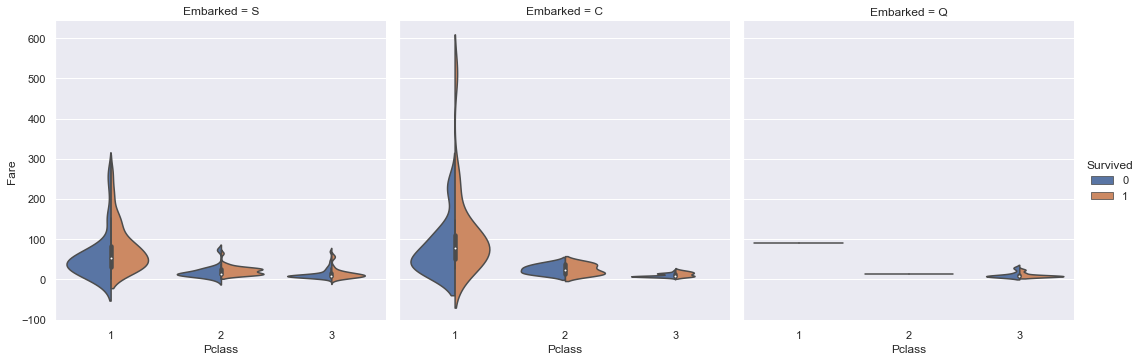

In [77]:
sns.catplot(x='Pclass', y='Fare', hue='Survived', data=train_data, col='Embarked', kind='violin', split=True);

## 6.18. Correlation Matrix

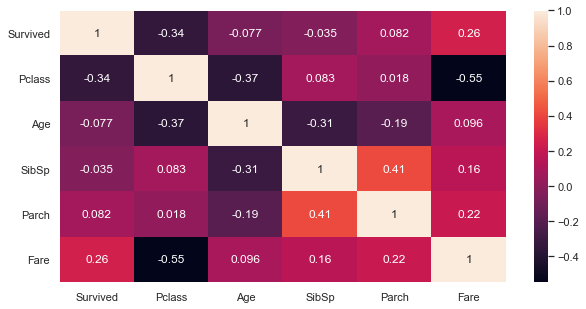

In [78]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data.drop(columns='PassengerId').corr(), annot=True)

plt.yticks(rotation=0);

## 6.19. Conclusion

* `1st` class passengers had a better survival chance than `2nd` and `3rd` classes. 

* `Women` had a better survival chance than `men`.

* `Women` from `1st` and `2nd` classes had almost `100%` survival chance. 

* `Men` from `2nd` and `3rd` classes had only around `10%` survival chance.

* `1st` class had very few `children` as compared to `2nd` and `3rd` classes. 

* `1st` class had more `old people` as compared to `2nd` and `3rd` classes.  

* People who aboard with `1` or `2` `siblings` or `spouse` had a better survival chance than who aboard `alone`.

* People who aboard with `1`, `2` or `3` `parents` or `children` had a better survival chance than who aboard `alone`.

* People aboard from `Cherbourg` had a better survival chance than who from `Southampton` or `Queenstown`.

# 7. Feature Engineering

In [79]:
train_test_data = pd.concat([train_data, test_data], axis=0)
train_len = train_data.shape[0]

In [80]:
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 7.1. Feature Creating

### 7.1.1. Title

In [81]:
train_test_data['Title'] = train_test_data['Name'].str.extract(r'([A-z]+)\.', expand=False)

In [82]:
train_test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [83]:
pd.crosstab(train_test_data.loc[:train_len - 1, 'Title'], train_test_data.loc[:train_len - 1, 'Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


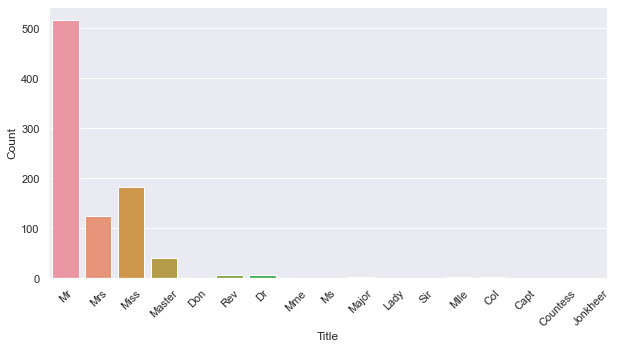

In [84]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Title', data=train_test_data[:train_len])

plt.ylabel('Count')
plt.xticks(rotation=45);

In [85]:
mapping = {'Mme': 'Mrs', 'Mlle': 'Miss', 'Ms': 'Miss', 'Capt': 'Rare', 'Col': 'Rare', 'Countess': 'Rare', 'Don': 'Rare',
           'Dona': 'Rare', 'Dr': 'Rare', 'Jonkheer': 'Rare', 'Lady': 'Rare', 'Major': 'Rare', 'Rev': 'Rare', 'Sir': 'Rare'}
train_test_data.replace({'Title': mapping}, inplace=True)

In [86]:
train_test_data.loc[:train_len - 1, 'Title'].value_counts().to_frame()

,Title
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


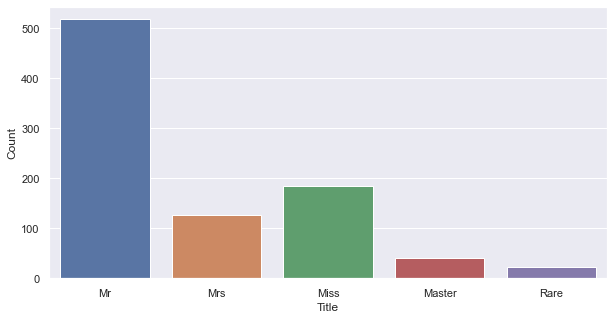

In [87]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Title', data=train_test_data[:train_len])

plt.ylabel('Count');

In [88]:
tab = pd.crosstab(train_test_data.loc[:train_len - 1, 'Title'], train_test_data.loc[:train_len - 1, 'Survived'].astype(int),
                  normalize='index')
tab

Survived,0,1
Title,,
Master,0.425000,0.575000
Miss,0.297297,0.702703
Mr,0.843327,0.156673
Mrs,0.206349,0.793651
Rare,0.652174,0.347826


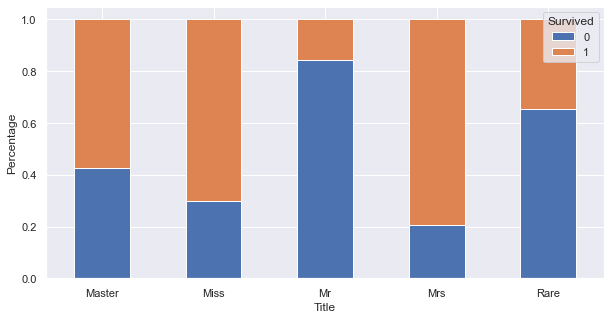

In [89]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

### 7.1.2. AgeGroup

In [90]:
df = train_test_data.groupby(by='Title')[['Age']].median()
df

,Age
Title,
Master,4.0
Miss,22.0
Mr,29.0
Mrs,35.0
Rare,47.5


In [91]:
for title, age in df.to_dict()['Age'].items():
    train_test_data.loc[(train_test_data['Age'].isna()) & (train_test_data['Title'] == title), 'Age'] = age

In [92]:
train_test_data['AgeGroup'] = pd.cut(train_test_data['Age'], 5)

In [93]:
train_test_data['AgeGroup'].unique()

[(16.136, 32.102], (32.102, 48.068], (48.068, 64.034], (0.0902, 16.136], (64.034, 80.0]]
Categories (5, interval[float64]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] < (48.068, 64.034] < (64.034, 80.0]]

In [94]:
train_test_data.loc[:train_len - 1, 'AgeGroup'].value_counts().to_frame()

,AgeGroup
"(16.136, 32.102]",501
"(32.102, 48.068]",206
"(0.0902, 16.136]",104
"(48.068, 64.034]",69
"(64.034, 80.0]",11


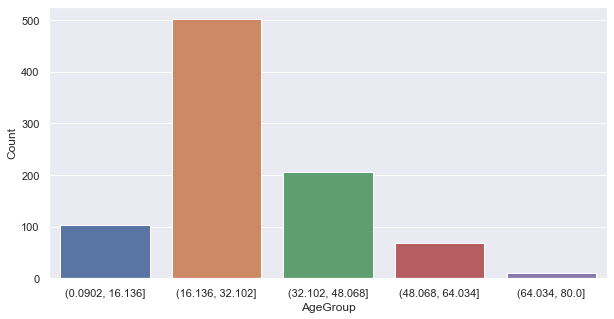

In [95]:
plt.figure(figsize=(10, 5))
sns.countplot(x='AgeGroup', data=train_test_data[:train_len])

plt.ylabel('Count');

In [96]:
tab = pd.crosstab(train_test_data.loc[:train_len - 1, 'AgeGroup'], train_test_data.loc[:train_len - 1, 'Survived'].astype(int),
                  normalize='index')
tab

Survived,0,1
AgeGroup,,
"(0.0902, 16.136]",0.451923,0.548077
"(16.136, 32.102]",0.672655,0.327345
"(32.102, 48.068]",0.563107,0.436893
"(48.068, 64.034]",0.565217,0.434783
"(64.034, 80.0]",0.909091,0.090909


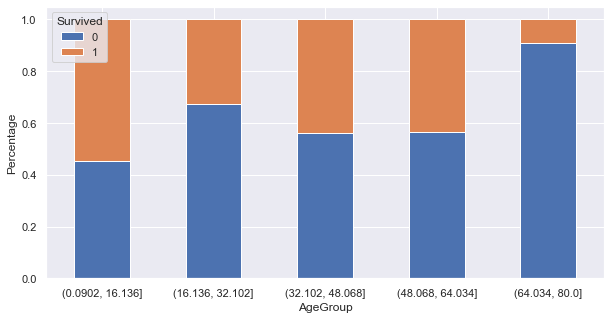

In [97]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

### 7.1.3. FamilySize

In [98]:
train_test_data['FamilySize'] = train_test_data['SibSp'] + train_test_data['Parch'] + 1

In [99]:
np.sort(train_test_data['FamilySize'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11], dtype=int64)

In [100]:
train_test_data.loc[:train_len - 1, 'FamilySize'].value_counts().to_frame()

,FamilySize
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


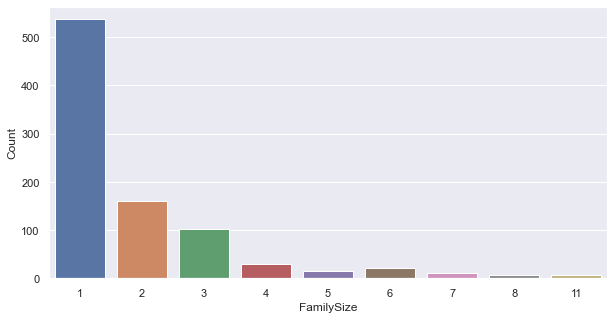

In [101]:
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', data=train_test_data[:train_len])

plt.ylabel('Count');

In [102]:
tab = pd.crosstab(train_test_data.loc[:train_len - 1, 'FamilySize'], 
                  train_test_data.loc[:train_len - 1, 'Survived'].astype(int))
tab

Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


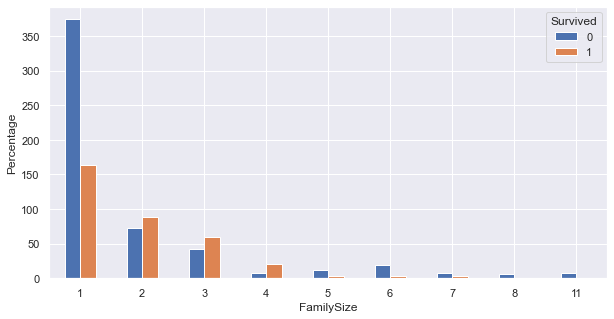

In [103]:
tab.plot(kind='bar', stacked=False, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

### 7.1.4. FamilyGroup

In [104]:
def family_size(size):
    d = {'alone': [1], 'small': [2, 3, 4], 'medium': [5, 6, 7], 'large': [8, 9, 10, 11]}
    for key, value in d.items():
         if size in value:
                return key

In [105]:
train_test_data['FamilyGroup'] = train_test_data['FamilySize'].map(family_size)

In [106]:
train_test_data['FamilyGroup'].unique()

array(['small', 'alone', 'medium', 'large'], dtype=object)

In [107]:
train_test_data.loc[:train_len - 1, 'FamilyGroup'].value_counts().to_frame()

,FamilyGroup
alone,537
small,292
medium,49
large,13


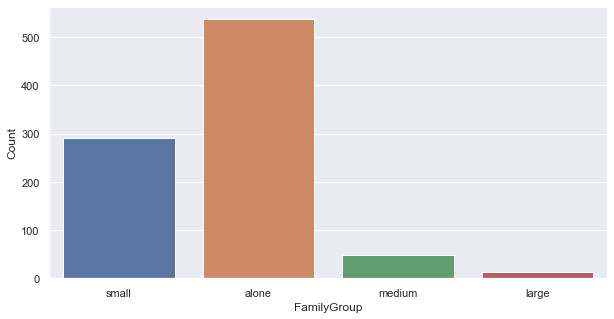

In [108]:
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilyGroup', data=train_test_data[:train_len])

plt.ylabel('Count');

In [109]:
tab = pd.crosstab(train_test_data.loc[:train_len - 1, 'FamilyGroup'], 
                  train_test_data.loc[:train_len - 1, 'Survived'].astype(int), normalize='index')
tab

Survived,0,1
FamilyGroup,,
alone,0.696462,0.303538
large,1.000000,0.000000
medium,0.795918,0.204082
small,0.421233,0.578767


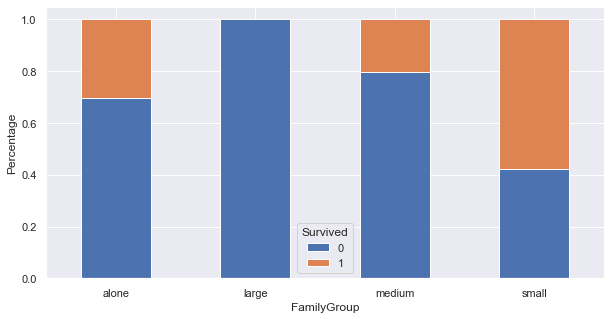

In [110]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

### 7.1.5. Alone

In [111]:
train_test_data['Alone'] = train_test_data['FamilyGroup'].map(lambda s: 'yes' if s == 'alone' else 'no')

In [112]:
train_test_data['Alone'].unique()

array(['no', 'yes'], dtype=object)

In [113]:
train_test_data.loc[:train_len - 1, 'Alone'].value_counts().to_frame()

,Alone
yes,537
no,354


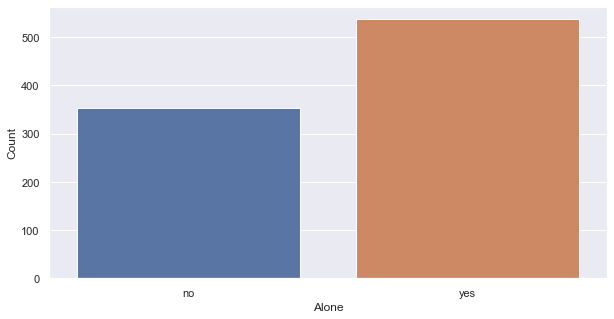

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Alone', data=train_test_data[:train_len])

plt.ylabel('Count');

In [115]:
tab = pd.crosstab(train_test_data.loc[:train_len - 1, 'Alone'], train_test_data.loc[:train_len - 1, 'Survived'].astype(int), 
                  normalize='index')
tab

Survived,0,1
Alone,,
no,0.494350,0.505650
yes,0.696462,0.303538


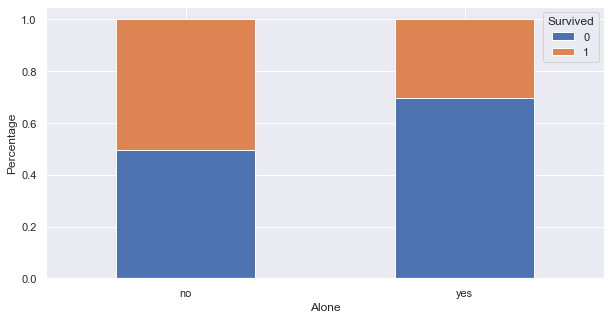

In [116]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

### 7.1.6. FamilySurvival

In [117]:
train_test_data['LastName'] = train_test_data['Name'].str.split(',', expand=True)[0]

In [118]:
df = train_test_data[(train_test_data['PassengerId'] <= train_len) & (train_test_data['FamilySize'] > 1)]

* 2.97% of families had a different fare.

In [119]:
size = df.groupby(by=['LastName', 'FamilySize'])[['PassengerId']].count().shape[0]
per_cent = ((df.groupby(by=['LastName', 'FamilySize'])['Fare'].max() - 
             df.groupby(by=['LastName', 'FamilySize'])['Fare'].min()) != 0).sum() / size * 100
per_cent

2.9702970297029703

* 44.724% of families survived and 35.678% of families perished.

In [120]:
df.groupby(by=['LastName', 'Fare'])[['Survived']].mean()['Survived'].value_counts(normalize=True).to_frame()

,Survived
1.000000,0.447236
0.000000,0.356784
0.500000,0.140704
0.666667,0.045226
0.333333,0.005025
0.750000,0.005025


In [121]:
SURVIVAL_VALUE = 0.5
train_test_data['FamilySurvival'] = SURVIVAL_VALUE

for group, df_group in train_test_data.groupby(by=['LastName', 'Fare']):
    if (len(df_group) != 1):
        for idx, row in df_group.iterrows():
            pass_id = row['PassengerId']
            smax = df_group.drop(idx)['Survived'].max()
            smin = df_group.drop(idx)['Survived'].min()
            if (smax == 1):
                train_test_data.loc[train_test_data['PassengerId'] == pass_id, 'FamilySurvival'] = 1
            elif (smin == 0):
                train_test_data.loc[train_test_data['PassengerId'] == pass_id, 'FamilySurvival'] = 0

In [122]:
df = train_test_data[:train_len].groupby(by='Ticket')

* 36.364% of groups survived and 29.546% of groups perished.

In [123]:
df1 = pd.concat([df['Survived'].mean(), df['LastName'].unique().map(len)], axis=1)
df1[df1['LastName'] > 1]['Survived'].value_counts(normalize=True).to_frame()

,Survived
1.000000,0.363636
0.000000,0.295455
0.500000,0.159091
0.666667,0.068182
0.750000,0.045455
0.714286,0.022727
0.333333,0.022727
0.250000,0.022727


In [124]:
for group, df_group in train_test_data.groupby(by='Ticket'):
    if (len(df_group) == 1):
        for idx, row in df_group.iterrows():
            if (row['FamilySurvival'] == 0) | (row['FamilySurvival'] == 0.5):
                pass_id = row['PassengerId']
                smax = df_group.drop(idx)['Survived'].max()
                smin = df_group.drop(idx)['Survived'].min()
                if (smax == 1):
                    train_test_data.loc[train_test_data['PassengerId'] == pass_id, 'FamilySurvival'] = 1
                elif (smin == 0):
                    train_test_data.loc[train_test_data['PassengerId'] == pass_id, 'FamilySurvival'] = 0

### 7.1.7. FareGroup

In [125]:
fare_median = train_test_data['Fare'].median()
fare_median

14.4542

In [126]:
train_test_data['Fare'].fillna(value=fare_median, inplace=True)

In [127]:
train_test_data['FareGroup']= pd.qcut(train_test_data['Fare'], 4)

In [128]:
train_test_data['FareGroup'].unique()

[(-0.001, 7.896], (31.275, 512.329], (7.896, 14.454], (14.454, 31.275]]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [129]:
train_test_data.loc[:train_len - 1, 'FareGroup'].value_counts().to_frame()

,FareGroup
"(14.454, 31.275]",229
"(7.896, 14.454]",224
"(-0.001, 7.896]",223
"(31.275, 512.329]",215


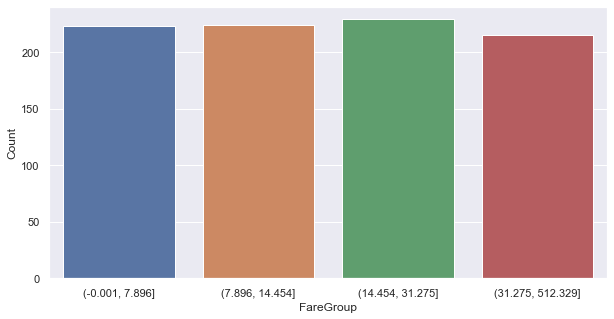

In [130]:
plt.figure(figsize=(10, 5))
sns.countplot(x='FareGroup', data=train_test_data[:train_len])

plt.ylabel('Count');

In [131]:
tab = pd.crosstab(train_test_data.loc[:train_len - 1, 'FareGroup'], train_test_data.loc[:train_len - 1, 'Survived'].astype(int),
                  normalize='index')
tab

Survived,0,1
FareGroup,,
"(-0.001, 7.896]",0.802691,0.197309
"(7.896, 14.454]",0.696429,0.303571
"(14.454, 31.275]",0.558952,0.441048
"(31.275, 512.329]",0.400000,0.600000


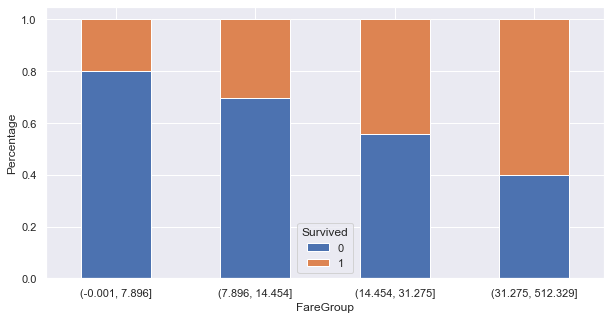

In [132]:
tab.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.ylabel('Percentage')
plt.xticks(rotation=0);

## 7.2. Feature Deleting

In [133]:
train_data = train_test_data[:train_len]
test_data = train_test_data[train_len:].drop(columns='Survived')
test_id = test_data['PassengerId']

In [134]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'AgeGroup',
       'FamilySize', 'FamilyGroup', 'Alone', 'LastName', 'FamilySurvival',
       'FareGroup'],
      dtype='object')

In [135]:
for data in [train_data, test_data]:
    data.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'FamilyGroup',
                       'LastName'], inplace=True)

## 7.3. Feature Encoding

### 7.3.1. One-hot encoding

In [136]:
nominal_features = ['Sex', 'Embarked', 'Title', 'Alone', 'FamilySurvival']

In [137]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = one_hot_encoder.fit_transform(train_data[nominal_features])
X_test_encoded = one_hot_encoder.transform(test_data[nominal_features])

### 7.3.2. Ordinal encoding

In [138]:
ordinal_features = ['Pclass', 'AgeGroup', 'FareGroup']

In [139]:
ordinal_encoder = OrdinalEncoder()
X_train_encoded = np.hstack((X_train_encoded, ordinal_encoder.fit_transform(train_data[ordinal_features])))
X_test_encoded = np.hstack((X_test_encoded, ordinal_encoder.transform(test_data[ordinal_features])))

## 7.4. Data Preparation

In [140]:
X = X_train_encoded
y = train_data['Survived'].astype(int)
x_test = X_test_encoded

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [142]:
X_train.shape, y_train.shape

((712, 18), (712,))

In [143]:
X_test.shape, y_test.shape

((179, 18), (179,))

In [144]:
x_test.shape

(418, 18)

* For convenience during cross-validation, can be used a pipeline.

In [145]:
preprocessor = ColumnTransformer(transformers=[('nominal', OneHotEncoder(handle_unknown='ignore'), nominal_features),
                                               ('ordinal', OrdinalEncoder(), ordinal_features)])

In [146]:
X = train_data.drop(columns='Survived')
y = train_data['Survived'].astype(int)
x_test = test_data

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [148]:
X_train.shape, y_train.shape

((712, 8), (712,))

In [149]:
X_test.shape, y_test.shape

((179, 8), (179,))

In [150]:
x_test.shape

(418, 8)

# 8. Machine Learning

In [151]:
def print_results(models, X_train, X_test, y_train, y_test):
    train_all_accuracy = []
    valid_all_accuracy = []
    test_all_accuracy = []
    for name, model in models.items():
        estimator = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        cv_results = cross_validate(estimator, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
        
        print(name, '\n')
        
        train_accuracy = cv_results['train_score'].mean()
        train_all_accuracy.append(train_accuracy)
        print(f'Accuracy of training: {train_accuracy}\n')
    
        valid_accuracy = cv_results['test_score'].mean()
        valid_all_accuracy.append(valid_accuracy)
        print(f'Accuracy of validation: {valid_accuracy}\n')

        test_accuracy = accuracy_score(y_test, y_pred)
        test_all_accuracy.append(test_accuracy)
        print(f'Accuracy of test: {test_accuracy}\n')
        
        print(f'Classification report\n{classification_report(y_test, y_pred)}\n\n')
    
    df = pd.DataFrame(list(zip(train_all_accuracy, valid_all_accuracy, test_all_accuracy)), index=models.keys(),
                      columns=['Training', 'Validation', 'Test'])
    df.index.name, df.columns.name = 'Model', 'Accuracy'
    return df

In [152]:
models = {'SGD Lasso': SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001, learning_rate='optimal', n_jobs=-1),
          'SGD Ridge': SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, learning_rate='optimal', n_jobs=-1), 
          'Logistic Regression': LogisticRegression(penalty='l2', C=1, n_jobs=-1),
          'SVM Linear': LinearSVC(penalty='l2', loss='squared_hinge', C=1),
          'SVM RBF': SVC(C=1, kernel='rbf', degree=3),
          'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski', n_jobs=-1),
          'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                                  max_features=None),
          'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                                  min_samples_leaf=1, max_features='sqrt', bootstrap=True, n_jobs=-1),
          'XGBoost': XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic',
                                   booster='gbtree', min_child_weight=1, subsample=1, colsample_bytree=1, reg_alpha=0,
                                   reg_lambda=1, scale_pos_weight=1, n_jobs=-1)}

In [153]:
results = print_results(models, X_train, X_test, y_train, y_test)

SGD Lasso 

Accuracy of training: 0.8167082909382419

Accuracy of validation: 0.8244459765586527

Accuracy of test: 0.6703910614525139

Classification report
              precision    recall  f1-score   support

           0       0.89      0.53      0.66       110
           1       0.54      0.90      0.68        69

    accuracy                           0.67       179
   macro avg       0.72      0.71      0.67       179
weighted avg       0.76      0.67      0.67       179



SGD Ridge 

Accuracy of training: 0.7458403477939137

Accuracy of validation: 0.7427558357135822

Accuracy of test: 0.776536312849162

Classification report
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       110
           1       0.68      0.80      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



Logistic Regression 

Accur

In [154]:
results

Accuracy,Training,Validation,Test
Model,,,
SGD Lasso,0.816708,0.824446,0.670391
SGD Ridge,0.745840,0.742756,0.776536
Logistic Regression,0.856395,0.845533,0.821229
SVM Linear,0.851829,0.848340,0.821229
SVM RBF,0.862361,0.852546,0.815642
KNN,0.870083,0.825864,0.770950
Decision Tree,0.912923,0.817414,0.787709
Random Forest,0.912923,0.837102,0.776536
XGBoost,0.873595,0.841288,0.815642


## 8.1. XGBoost

In [155]:
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
                                                       objective='binary:logistic', booster='gbtree', min_child_weight=1,
                                                       subsample=1, colsample_bytree=1, reg_alpha=0, reg_lambda=1,
                                                       scale_pos_weight=1, n_jobs=-1))])
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)

In [156]:
cv_results_xgb = cross_validate(clf_xgb, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)

In [157]:
train_accuracy_xgb = cv_results_xgb['train_score'].mean()
print(f'Accuracy of training: {train_accuracy_xgb}')

Accuracy of training: 0.8735947954244134


In [158]:
valid_accuracy_xgb = cv_results_xgb['test_score'].mean()
print(f'Accuracy of validation: {valid_accuracy_xgb}')

Accuracy of validation: 0.8412882891756132


In [159]:
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy of test: {test_accuracy_xgb}')

Accuracy of test: 0.8156424581005587


### 8.1.1. Classification report

In [160]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



### 8.1.2. Feature importances

In [161]:
feature_names = np.concatenate((clf_xgb.named_steps['preprocessor'].named_transformers_['nominal'] \
                                .get_feature_names(nominal_features), clf_xgb.named_steps['preprocessor'].transformers_[1][2]))

In [162]:
show_weights(clf_xgb.named_steps['classifier'], feature_names=feature_names, top=18)

Weight,Feature
0.3196,Title_Mr
0.2169,Sex_female
0.1312,FamilySurvival_0.0
0.0665,Pclass
0.0555,FamilySurvival_1.0
0.0422,Alone_no
0.0407,Title_Rare
0.0275,Title_Master
0.0263,Embarked_S
0.0227,FareGroup


### 8.1.3. Validation curves

In [163]:
def plot_curves(train_scores, valid_scores, param_name, param_range, score_name):
    train_scores_mean, valid_scores_mean = train_scores.mean(axis=1), valid_scores.mean(axis=1)
    train_scores_std, valid_scores_std = train_scores.std(axis=1), valid_scores.std(axis=1)

    plt.figure(figsize=(10, 5))
    plt.plot(param_range, train_scores_mean, '-o', label='Training score')
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
    plt.plot(param_range, valid_scores_mean, '-o', label='Validation score')
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.3)
    
    plt.xlabel(param_name)
    plt.ylabel(score_name)
    plt.legend()

#### 8.1.3.1. max_depth

In [164]:
max_depth = np.arange(2, 11)
train_scores, valid_scores = validation_curve(clf_xgb, X_train, y_train, param_name='classifier__max_depth',
                                              param_range=max_depth, scoring='accuracy', cv=5, n_jobs=-1)

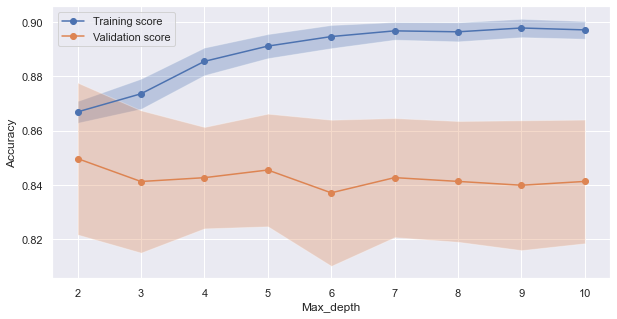

In [165]:
plot_curves(train_scores, valid_scores, 'Max_depth', max_depth, 'Accuracy')

#### 8.1.3.2. learning_rate

In [166]:
learning_rate = np.linspace(0.01, 0.2, num=20)
train_scores, valid_scores = validation_curve(clf_xgb, X_train, y_train, param_name='classifier__learning_rate',
                                              param_range=learning_rate, scoring='accuracy', cv=5, n_jobs=-1)

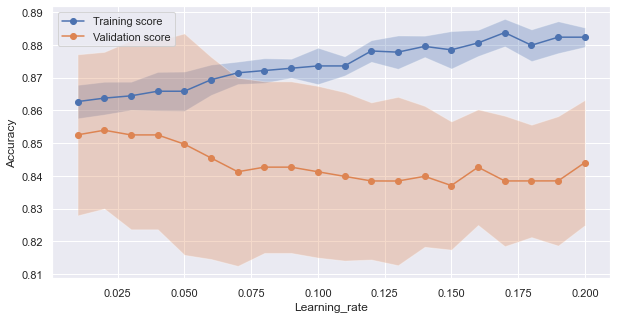

In [167]:
plot_curves(train_scores, valid_scores, 'Learning_rate', learning_rate, 'Accuracy')

#### 8.1.3.3. n_estimators

In [168]:
n_estimators = np.linspace(100, 1000, num=10)
train_scores, valid_scores = validation_curve(clf_xgb, X_train, y_train, param_name='classifier__n_estimator',
                                              param_range=n_estimators, scoring='accuracy', cv=5, n_jobs=-1)

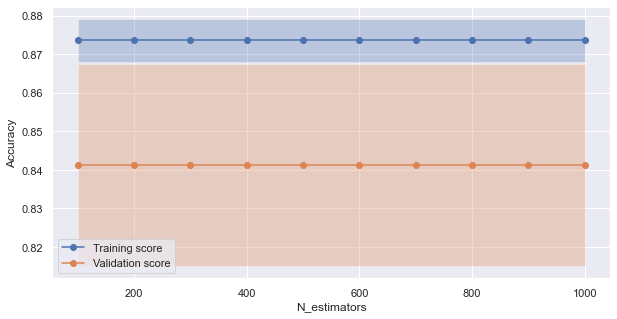

In [169]:
plot_curves(train_scores, valid_scores, 'N_estimators', n_estimators, 'Accuracy')

### 8.1.4. Learning curves

In [170]:
train_sizes, train_scores, valid_scores = learning_curve(clf_xgb, X_train, y_train, train_sizes=[0.25, 0.5, 0.75, 1],
                                                         scoring='accuracy', cv=5, n_jobs=-1)

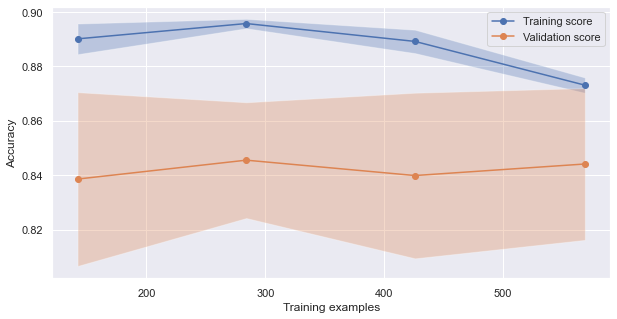

In [171]:
plot_curves(train_scores, valid_scores, 'Training examples', train_sizes, 'Accuracy')

* Can be tried to use all training dataset for learning.

In [172]:
train_sizes, train_scores, valid_scores = learning_curve(clf_xgb, X, y, train_sizes=[0.25, 0.5, 0.75, 1],
                                                         scoring='accuracy', cv=5, n_jobs=-1)

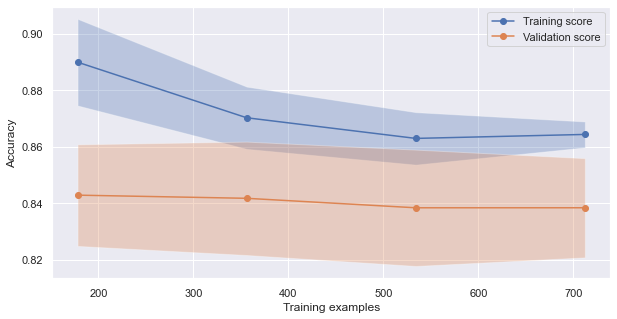

In [173]:
plot_curves(train_scores, valid_scores, 'Training examples', train_sizes, 'Accuracy')

## 8.2. XGBoost Tuning

In [174]:
clf_xgb.named_steps['classifier'].get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [175]:
param_xgb = {'classifier__learning_rate': [0.01, 0.05, 0.1], 'classifier__max_depth': [2, 3, 4, 6, 8],
             'classifier__n_estimators': [100, 200, 500]}

In [176]:
grid_xgb = GridSearchCV(clf_xgb, param_xgb, scoring='accuracy', cv=5, return_train_score=True)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'classifier__learning_rate': 0.01,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 200}

In [177]:
clf_xgb_tuned = grid_xgb.best_estimator_
clf_xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = clf_xgb_tuned.predict(X_test)

In [178]:
clf_xgb_tuned.named_steps['classifier'].get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [179]:
train_accuracy_xgb_tuned = grid_xgb.cv_results_['mean_train_score'][0]
print(f'Accuracy of training: {train_accuracy_xgb_tuned}')

Accuracy of training: 0.8546344772299819


In [180]:
valid_accuracy_xgb_tuned = grid_xgb.best_score_
print(f'Accuracy of validation: {valid_accuracy_xgb_tuned}')

Accuracy of validation: 0.8539643455136414


In [181]:
test_accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f'Accuracy of test: {test_accuracy_xgb_tuned}')

Accuracy of test: 0.8156424581005587


### 8.2.1. Feature importances

In [182]:
df = pd.DataFrame(data=clf_xgb_tuned.named_steps['classifier'].feature_importances_, index=feature_names, columns=['Weight'])
df.index.name, df.columns.name = 'Feature', 'Importance'
df

Importance,Weight
Feature,
Sex_female,0.196216
Sex_male,0.000000
Embarked_C,0.011885
Embarked_Q,0.000259
Embarked_S,0.026628
Title_Master,0.017626
Title_Miss,0.000000
Title_Mr,0.450415
Title_Mrs,0.000000


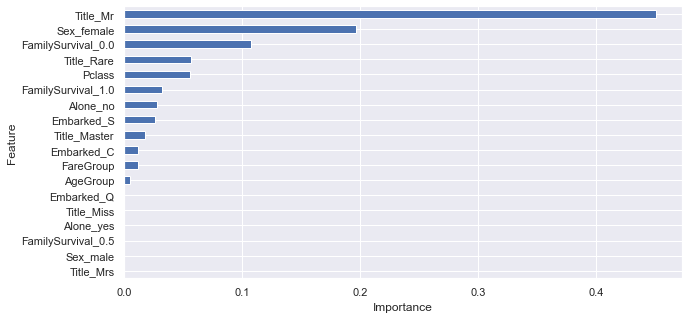

In [183]:
df.sort_values(by='Weight', ascending=True).plot(kind='barh', figsize=(10, 5), legend=False)

plt.xlabel('Importance');

### 8.2.2. Classification report

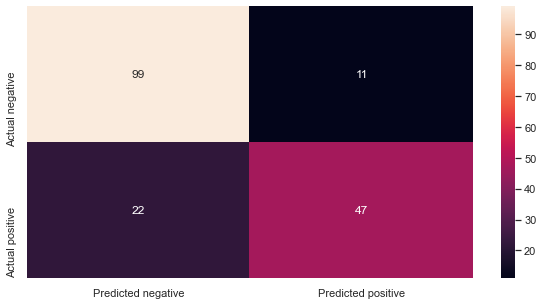

In [184]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned, labels=[0, 1]), fmt='.0f', annot=True, 
            xticklabels=['Predicted negative', 'Predicted positive'], yticklabels=['Actual negative', 'Actual positive']);

In [185]:
print(classification_report(y_test, y_pred_xgb_tuned))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



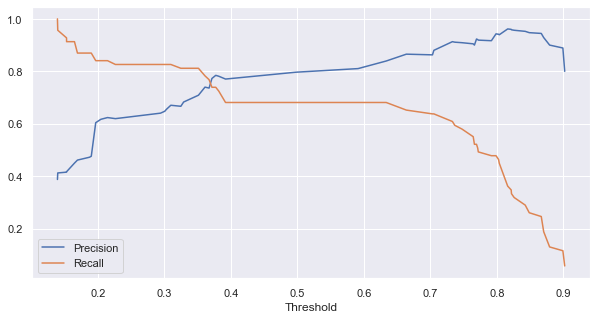

In [186]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_xgb_tuned.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')

plt.xlabel('Threshold')
plt.legend();

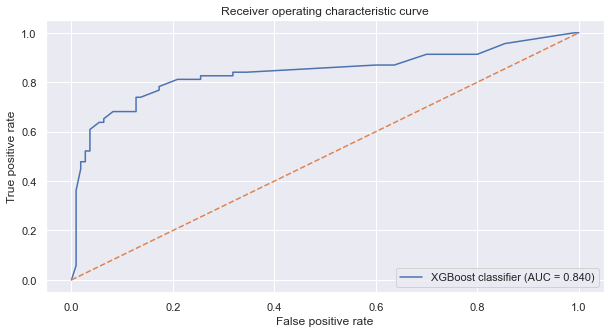

In [187]:
fpr, tpr, thresholds = roc_curve(y_test, clf_xgb_tuned.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, clf_xgb_tuned.predict_proba(X_test)[:, 1]) 

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'XGBoost classifier (AUC = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], '--')

plt.title('Receiver operating characteristic curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right');

In [188]:
idx = np.argmin(euclidean_distances(list(zip(fpr, tpr)), [[0, 1]]))
best_threshold = thresholds[idx]
print(f'Best threshold: {best_threshold}')

Best threshold: 0.36109787225723267


# 9. Create submission file

In [189]:
submission = pd.DataFrame({'PassengerId': test_id, 'Survived': clf_xgb_tuned.predict(x_test)})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [190]:
submission.to_csv('datasets/submission.csv', index=False)